In [1]:
import igraph
import glob
import copy
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline

In [2]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

g_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='green')and (f.split('/')[-1].split('_')[2]=='projection.csv') ) ])
b_MW_files =sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='blue') and (f.split('/')[-1].split('_')[2]=='projection.csv') )])
all_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='all') and (f.split('/')[-1].split('_')[2]=='projection.csv'))])

print all_MW_files

['./matrix_csvs/2004.75_all_projection.csv', './matrix_csvs/2007.75_all_projection.csv', './matrix_csvs/2008.75_all_projection.csv', './matrix_csvs/2009.75_all_projection.csv', './matrix_csvs/2010.75_all_projection.csv', './matrix_csvs/2011.5_all_projection.csv', './matrix_csvs/2012.75_all_projection.csv', './matrix_csvs/2013.75_all_projection.csv', './matrix_csvs/2014.75_all_projection.csv', './matrix_csvs/2015.0_all_projection.csv', './matrix_csvs/2015.25_all_projection.csv', './matrix_csvs/2015.5_all_projection.csv', './matrix_csvs/2015.75_all_projection.csv', './matrix_csvs/2016.0_all_projection.csv', './matrix_csvs/2016.25_all_projection.csv', './matrix_csvs/2016.5_all_projection.csv', './matrix_csvs/2016.75_all_projection.csv', './matrix_csvs/2017.0_all_projection.csv', './matrix_csvs/2017.25_all_projection.csv', './matrix_csvs/2017.5_all_projection.csv', './matrix_csvs/2017.75_all_projection.csv']


In [3]:
""" get a dict going with files and data """
data = {}
years = range(2007,2018)
years_m = [2007,2008,2009,2010,2012,2013,2014,2015,2016,2017]
for y in years_m:
    fname_all = [f for f in all_MW_files if ((str(y)+'.75') in f)][0]
    fname_g = [f for f in g_MW_files if ((str(y)+'.75') in f)][0]
    fname_b = [f for f in b_MW_files if ((str(y)+'.75') in f)][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0,
             'fname_g':fname_g,
             'data_g':0.0,
             'fname_b':fname_b,
             'data_b':0.0}

    #2011 notes
data[2011]={'data_b': 0.0,
            'data_g': 0.0,
            'year': 2011,
            'fname_g': './matrix_csvs/2011.5_green_projection.csv',
            'fname_b': './matrix_csvs/2011.5_blue_projection.csv',
            'data_all': 0.0,
            'fname_all': './matrix_csvs/2011.5_all_projection.csv'}
    
for y in years:
    print data[y]

{'data_b': 0.0, 'data_g': 0.0, 'year': 2007, 'fname_g': './matrix_csvs/2007.75_green_projection.csv', 'fname_b': './matrix_csvs/2007.75_blue_projection.csv', 'data_all': 0.0, 'fname_all': './matrix_csvs/2007.75_all_projection.csv'}
{'data_b': 0.0, 'data_g': 0.0, 'year': 2008, 'fname_g': './matrix_csvs/2008.75_green_projection.csv', 'fname_b': './matrix_csvs/2008.75_blue_projection.csv', 'data_all': 0.0, 'fname_all': './matrix_csvs/2008.75_all_projection.csv'}
{'data_b': 0.0, 'data_g': 0.0, 'year': 2009, 'fname_g': './matrix_csvs/2009.75_green_projection.csv', 'fname_b': './matrix_csvs/2009.75_blue_projection.csv', 'data_all': 0.0, 'fname_all': './matrix_csvs/2009.75_all_projection.csv'}
{'data_b': 0.0, 'data_g': 0.0, 'year': 2010, 'fname_g': './matrix_csvs/2010.75_green_projection.csv', 'fname_b': './matrix_csvs/2010.75_blue_projection.csv', 'data_all': 0.0, 'fname_all': './matrix_csvs/2010.75_all_projection.csv'}
{'data_b': 0.0, 'data_g': 0.0, 'year': 2011, 'fname_g': './matrix_csvs/2

In [4]:
""" read in all the data """
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8').set_index('Unnamed: 0')
    data[y]['data_g']=pd.read_csv(data[y]['fname_g'], encoding='utf-8').set_index('Unnamed: 0')
    data[y]['data_b']=pd.read_csv(data[y]['fname_b'], encoding='utf-8').set_index('Unnamed: 0')
    #data[y]['data_ff'] = data[y]['data_all'].subtract(data[y]['data_g'], fill_value=0.0).subtract(data[y]['data_b'], fill_value=0.0)

print data[2017]['data_all'][data[2017]['data_all'].index=='UA'].sum().sum()

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
0.999822330794


In [5]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def degree(x):
    #print x
    #print 'softmax: ', softmax(x)
    #raw_input('-->')
    return np.sum(softmax(x)/np.max(x))/x.shape[0]

In [6]:
""" get dregree for all data"""

for y in years:
    print y
    for data_str in ['data_all','data_g','data_b']:
        df = data[y][data_str]
        #degree just with connections
        df['degree_simple'] = df[df>0].count(axis=1)
    
        #degree with algo
        df['degree_norm'] = df.apply(lambda row: degree(row/np.sum(row)), axis=1)
    

        cols = [c for c in list(df) if len(c)<3]
        df['sum'] = df[cols].sum(axis=1)
        df['cumsum'] = df['sum'].cumsum()
    
        data[y][data_str] = df.sort_values('sum', ascending=False)

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [7]:
"""join with region and portions"""

country_info = pd.read_csv('all_portions.csv', encoding='utf-8').set_index('iso2')

print country_info



for y in years:
    print y
    for data_str in ['data_all','data_g','data_b']:
        data[y][data_str] = data[y][data_str].join(country_info[['SIPS_REGION',str(y)+'_all',str(y)+'_g',str(y)+'_b',str(y)+'_portion']])
        


      Unnamed: 0                          country iso3  iso_num       region  \
iso2                                                                           
AF             0                      Afghanistan  AFG      4.0         ASIA   
AX             1                    Aland Islands  ALA    248.0       EUROPE   
AL             2                          Albania  ALB      8.0       EUROPE   
DZ             3                          Algeria  DZA     12.0       AFRICA   
AS             4                   American Samoa  ASM     16.0  ANZ-OCEANIA   
AD             5                          Andorra  AND     20.0       EUROPE   
AO             6                           Angola  AGO     24.0       AFRICA   
AI             7                         Anguilla  AIA    660.0        LATIN   
AQ             8                       Antarctica  ATA     10.0  ANZ-OCEANIA   
AG             9              Antigua and Barbuda  ATG     28.0        LATIN   
AR            10                        

In [8]:
print list(data[2017]['data_all'])
print data[2017]['data_all'].SIPS_REGION.unique()
print data[2017]['data_all'].degree_norm
print data[2017]['data_all']['2017_portion']

[u'UA', u'CZ', u'HR', u'BG', u'CU', u'AU', u'AR', u'BR', u'SV', u'TH', u'SY', u'IN', u'GB', u'MX', u'ES', u'KR', u'PK', u'EG', u'PE', u'KY', u'VN', u'NL', u'IT', u'DE', u'DK', u'NO', u'SG', u'BE', u'FI', u'CH', u'SE', u'GL', u'NG', u'JP', u'ET', u'BS', u'PH', u'TM', u'IR', u'RU', u'CL', u'EC', u'AE', u'ZA', u'KE', u'TD', u'ZW', u'AT', u'SA', u'GE', u'CI', u'FR', u'PT', u'CG', u'LB', u'SD', u'LY', u'QA', u'LK', u'HN', u'GR', u'BO', u'VE', u'NP', u'IE', u'HU', u'GH', u'TR', u'PL', u'LV', u'NZ', u'YE', u'TJ', u'ID', u'ER', u'UG', u'DZ', u'RO', u'CN', u'MY', u'CR', u'LU', u'AO', u'DO', u'AF', u'IL', u'MA', u'RW', u'GU', u'AM', u'DJ', u'MM', u'PG', u'CY', u'RE', u'CO', u'GT', u'CM', u'EE', u'PW', u'TL', u'MR', u'CK', u'PF', u'NR', u'SI', u'UZ', u'EH', u'LT', u'GA', u'BJ', u'CD', u'KZ', u'KG', u'OM', u'SS', u'JO', u'BD', u'WS', u'SR', u'IQ', u'BH', u'HT', u'MD', u'MV', u'PS', u'NU', u'MN', u'UY', u'TV', u'NI', u'MG', u'BZ', u'MP', u'GI', u'GQ', u'KP', u'IS', u'KH', u'MZ', u'GY', u'NE', u'PA'

Unnamed: 0
US    #9b738c
FR    #efef4c
GB    #efef4c
BR    #e59620
EG    #0c478c
TZ    #0c478c
AU    #52d6ea
CN    #ffd1a0
DE    #efef4c
ZA    #0c478c
MX    #c12053
IT    #efef4c
SE    #efef4c
ES    #efef4c
JP    #52d6ea
PT    #efef4c
PH    #c57aff
RU    #7e8c24
IN    #f21f34
BG    #7e8c24
IR    #3ea535
AR    #e59620
HR    #7e8c24
TW    #c57aff
SA    #3ea535
ZM    #0c478c
AL    #7e8c24
KM    #0c478c
LT    #7e8c24
NZ    #52d6ea
       ...   
LY    #0c478c
KR    #52d6ea
SG    #c57aff
BE    #efef4c
DO    #e59620
LK    #c57aff
FJ    #c57aff
NL    #efef4c
TN    #0c478c
PG    #c57aff
FI    #efef4c
ZW    #0c478c
KE    #0c478c
CA    #c12053
ID    #c57aff
AO    #0c478c
HU    #efef4c
PK    #c57aff
IE    #efef4c
GP    #e59620
GN    #0c478c
GU    #c57aff
PA    #e59620
IM    #c57aff
BD    #c57aff
GA    #c57aff
ML    #0c478c
NI    #e59620
NC    #c57aff
SH    #c57aff
Name: color, Length: 219, dtype: object
Unnamed: 0
US    28
FR    39
GB    45
BR     9
EG     3
TZ     3
AU    23
CN    13
DE    26
ZA 

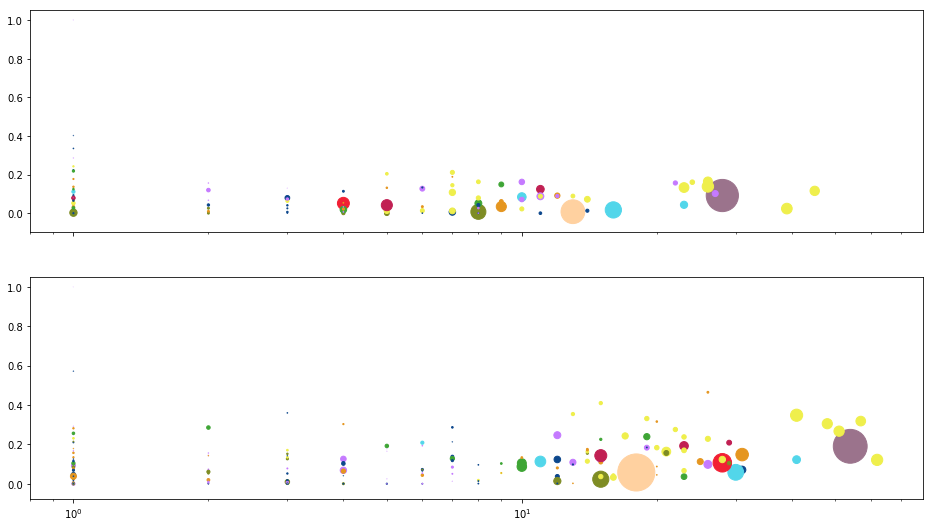

In [9]:
""" portion green vs. degree vs. region vs. size """

cols_dict = {
    'OTHERX':'#7700a3',
    'US':'#00ffcb',
    'LAM':'#ffb200',
    'OECD_EUR':'#0021ff',
    'OECD_PAC':'#00cbff',
    'OECD_AMX':'#0f0066',
    'AFRICA':'#00ff08',
    'ME':'#3ea535',
    'CN':'#ff0043',
    'IN':'#ff00d4',
    'TE':'#6b5900'
}

f, axarr = plt.subplots(2,sharex=True, figsize=(16,9))

for r in axarr:
    #for c in r:
        #c.set_yscale('log')
    r.set_xscale('log')

ii=0
for y in [2007,2017]:
    #print data[y]['data_g'].shape
    #print data[y]['data_all'].SIPS_REGION
    #print data[y]['data_all'].loc['UA']
    #print data[y]['data_all'].shape
    data[y]['data_all']['color'] = data[y]['data_all'].apply(lambda row: cols_dict[row['SIPS_REGION']], axis=1)
    #print data[y]['data_all']['color']
    df = data[y]['data_all']
    print df.color
    print df.degree_simple
    axarr[ii].scatter(df['degree_simple'],df[str(y)+'_portion'],s=df[str(y)+'_all']/1000, c=df['color'])
    ii+=1
    
plt.show()

    
#print data[2017]['data_all']['por_green']

24
2
2
2
2
2
9
8
10
18
20
24
OTHERX [3.2222222222222223, 3.1454545454545455, 3.0, 2.982142857142857, 3.263157894736842, 3.4310344827586206, 3.4310344827586206, 3.7288135593220337, 3.864406779661017, 3.9661016949152543, 4.033898305084746]
US [28.0, 27.0, 29.0, 30.0, 33.0, 37.0, 38.0, 42.0, 39.0, 52.0, 54.0]
LAM [2.325, 2.6, 2.75, 2.95, 3.275, 3.575, 4.15, 5.2, 6.15, 6.525, 6.725]
OECD_EUR [11.666666666666666, 11.481481481481481, 12.222222222222221, 13.185185185185185, 13.851851851851851, 16.185185185185187, 17.74074074074074, 19.333333333333332, 20.814814814814813, 21.62962962962963, 22.51851851851852]
OECD_PAC [12.5, 12.75, 13.25, 13.0, 13.0, 14.5, 14.0, 17.5, 19.0, 19.5, 22.0]
OECD_AMX [5.666666666666667, 4.0, 6.666666666666667, 7.0, 8.0, 9.333333333333334, 11.333333333333334, 12.666666666666666, 15.0, 22.0, 22.333333333333332]
AFRICA [2.2884615384615383, 2.6538461538461537, 2.519230769230769, 2.326923076923077, 2.326923076923077, 2.7115384615384617, 3.0, 3.490566037735849, 4.01886792

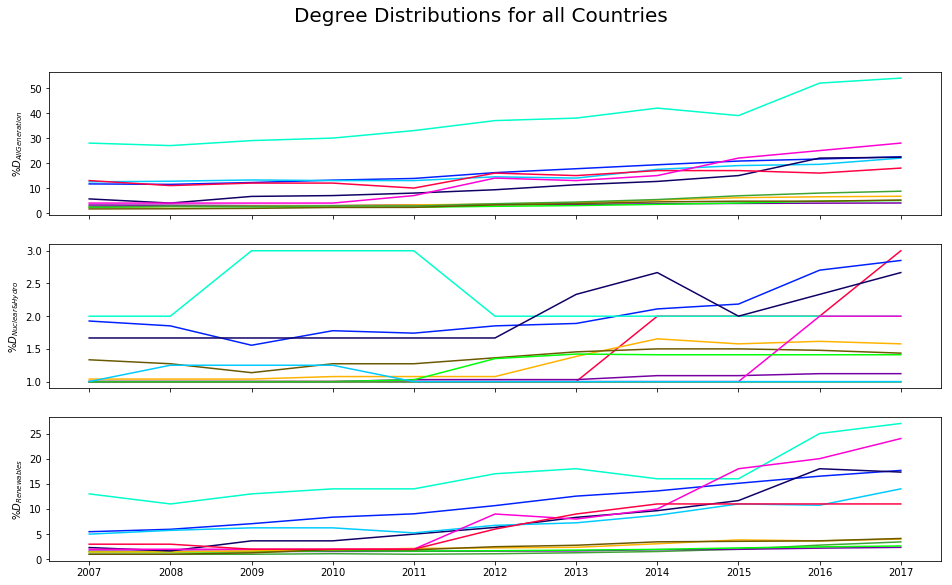

In [10]:
""" degree vs time """

cols_dict = {
    'OTHERX':'#7700a3',
    'US':'#00ffcb',
    'LAM':'#ffb200',
    'OECD_EUR':'#0021ff',
    'OECD_PAC':'#00cbff',
    'OECD_AMX':'#0f0066',
    'AFRICA':'#00ff08',
    'ME':'#3ea535',
    'CN':'#ff0043',
    'IN':'#ff00d4',
    'TE':'#6b5900'
}

f, axarr = plt.subplots(3,sharex=True, figsize=(16,9))

axarr[0].set_xticks(years)

#for r in axarr:
    #for c in r:
        #c.set_yscale('log')
#    r.set_xscale('log')

print data[2017]['data_g'].loc['IN'].degree_simple


ii=0
for data_str in ['data_all','data_b','data_g']:
    degree_means = {}
    degree_std = {}
    
    
    for y in years:
        print data[y]['data_g'].loc['IN'].degree_simple

        #print data[y]['data_g'].shape
        #print data[y]['data_all'].SIPS_REGION
        #print data[y]['data_all'].loc['UA']
        #print data[y]['data_all'].shape
        #data[y]['data_all']['color'] = data[y]['data_all'].apply(lambda row: cols_dict[row['SIPS_REGION']], axis=1)
        #print data[y]['data_all']['color']
        df = data[y][data_str]
        #print list(df)
        #print df.color
        degree_means[y] = df.groupby('SIPS_REGION').mean().degree_simple.to_dict()
        degree_std[y] = df.groupby('SIPS_REGION').std().degree_simple.to_dict()
        #print len(df.groupby('SIPS_REGION').mean().degree_simple.to_dict())
    for r in df.SIPS_REGION.unique():
        print r,[degree_means[y][r] for y in years]
        axarr[ii].plot(years, np.array([degree_means[y][r] for y in years]), c=cols_dict[r])
    ii+=1


axarr[0].set_ylabel('%$D_{All Generation}$')
axarr[1].set_ylabel('%$D_{Nuclear & Hydro}$')
axarr[2].set_ylabel('%$D_{Renewables}$')    
    
lines = []
labels=[]
for k,v in cols_dict.items():
    labels.append(k)
    lines.append(mlines.Line2D([0],[0],color=v))

f.legend(lines, labels, loc='center', bbox_to_anchor=(0.5,0.92), ncol=len(cols_dict))
f.suptitle('Degree Distributions for all Countries', fontsize=20)
f.savefig('country_degree.png')
plt.show()

2
24
2
24
2
24


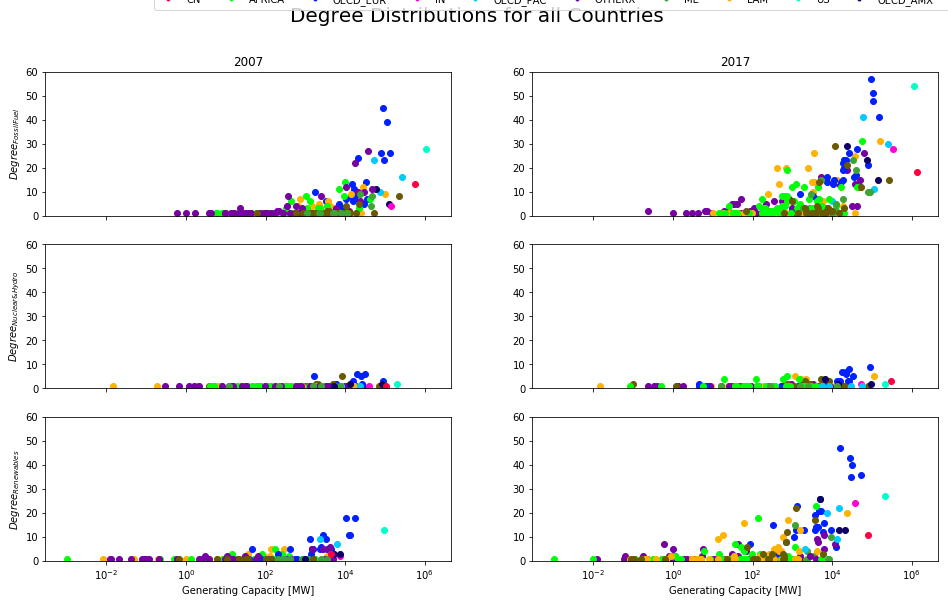

In [145]:
import matplotlib.markers as mmarkers

f, axarr = plt.subplots(nrows=3,ncols=2,sharex=True, figsize=(16,9))

for r in axarr:
    for c in r:
        #c.set_yscale('log')
        c.set_xscale('log')
        c.set_ylim(0,60)

#axarr[0].set_yscale('log')
#axarr[1].set_yscale('log')
#axarr[2].set_yscale('log')
#axarr[0].set_xscale('log')
#axarr[1].set_xscale('log')
#axarr[2].set_xscale('log')
#axarr[0].set_xtickabels(years)


#cols_dict={0:'black',1:'blue',2:'green'}
MW_dict = {0:'_all',1:'_b',2:'_g'}

ii=0
jj=-1
for data_str in ['data_all','data_b','data_g']:
    jj+=1
    ii=0
    
    
    for y in [2007,2017]:
        print data[y]['data_g'].loc['IN'].degree_simple

        #print data[y]['data_g'].shape
        #print data[y]['data_all'].SIPS_REGION
        #print data[y]['data_all'].loc['UA']
        #print data[y]['data_all'].shape
        #data[y]['data_all']['color'] = data[y]['data_all'].apply(lambda row: cols_dict[row['SIPS_REGION']], axis=1)
        #print data[y]['data_all']['color']
        df = data[y][data_str]
        #print list(df)
        #print df.color
        #degree_means[y] = df.groupby('SIPS_REGION').mean().degree_simple.to_dict()
        #degree_std[y] = df.groupby('SIPS_REGION').std().degree_simple.to_dict()
        #print len(df.groupby('SIPS_REGION').mean().degree_simple.to_dict())
        
        for r in df.SIPS_REGION.unique():
            axarr[jj,ii].scatter(df[df.SIPS_REGION==r][str(y)+MW_dict[jj]], df[df.SIPS_REGION==r]['degree_simple'], color=cols_dict[r])
        
        ii+=1



lines = []
labels=[]
for k,v in cols_dict.items():
    labels.append(k)
    lines.append(mlines.Line2D([0],[0],marker=".", linestyle='none', color=v))

f.legend(lines, labels, loc='center', bbox_to_anchor=(0.5,0.93), ncol=len(cols_dict))


axarr[0,0].set_ylabel('$Degree_{Fossil Fuel}$')
axarr[1,0].set_ylabel('$Degree_{Nuclear & Hydro}$')
axarr[2,0].set_ylabel('$Degree_{Renewables}$')

axarr[0,0].set_title('2007')
axarr[0,1].set_title('2017')

axarr[2,0].set_xlabel('Generating Capacity [MW]')
axarr[2,1].set_xlabel('Generating Capacity [MW]')

f.suptitle('Degree Distributions for all Countries', fontsize=20)
#f.legend((black_line,gray_patch), ('$Degree_{Mean}$','$Degree_{Std}}$'), loc='center', bbox_to_anchor=(0.5,0.92), ncol=2)
f.savefig('country_dd_simple.png')



plt.show()

#print np.mean(degree_means)

[ 1.          1.          0.97749637  0.99303004  0.99621153  0.99263896
  1.          0.99491477  0.9826667   0.9690032   0.99236843  0.98700732
  0.99677501  0.98367655  0.99256179  0.97751619  1.          0.99591302
  0.99890577  1.          0.99350091  1.          0.9995864   0.99988506
  1.          1.          0.99981587  0.99078674  1.          0.99818629
  0.97489527  1.          1.          0.98171394  0.98686624  0.997251
  0.99988598  1.          1.          0.99882198  0.99555422  0.99275735
  1.          0.9985598   0.98296629  0.99532499  1.          0.990652
  0.99856642  0.96002367  0.99536882  0.99668824  0.98869585  1.          1.
  0.9985597   0.99981288  0.98888614  1.          1.          1.          1.
  1.          0.99890717  0.99833102  0.99326825  1.          0.96060752
  0.97253824  1.          0.99839339  0.98065739  0.99990086  1.          1.
  0.97650699  1.          1.          1.          1.          0.99853285
  0.99976318  0.97548768  0.99887298  1.   

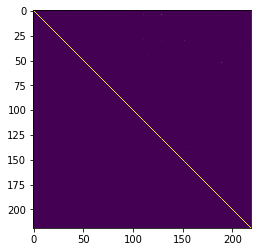

[ 1.          1.          0.98162935  0.99306569  0.99582705  0.99264669
  0.99800836  1.          0.97500047  0.99982577  0.9950641   0.99134234
  0.98956975  0.97399419  1.          0.99006799  0.99988988  0.98718818
  0.99640459  0.98877064  0.99290703  0.97319312  1.          0.99656387
  0.99890731  1.          0.99360127  1.          0.99964226  0.99988499
  1.          1.          0.99775586  1.          0.9731451   1.          1.
  0.98686816  0.99702715  0.99989828  1.          1.          0.99884713
  0.98346538  0.99223359  1.          0.99866282  0.98316123  0.99342618
  1.          1.          0.99061949  0.99862542  0.96001574  0.99482907
  0.99668824  0.98550094  1.          0.99859121  0.98898156  1.          1.
  1.          1.          1.          0.99891093  0.99993739  0.9932462
  0.99997656  0.99877278  0.96060752  0.98206814  1.          0.99832937
  1.          0.97664619  1.          1.          0.99056463  1.          1.
  1.          1.          1.          0.

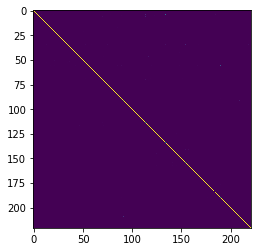

[ 1.          1.          0.955234    0.99428921  0.99375563  0.99339233
  0.99721512  1.          0.95738191  0.9998377   0.9953065   0.99042226
  0.98927467  0.97487353  1.          0.98989439  0.99989932  0.97463509
  0.98479789  0.99639612  0.94957525  0.99292563  0.973606    1.
  0.99867641  0.99884246  1.          0.99331339  1.          0.99965454
  0.99988642  1.          0.99741873  0.99776348  1.          1.          1.
  0.98686816  0.99735574  0.99990896  1.          1.          0.99916855
  0.98163267  0.99110647  1.          0.99872783  0.98443461  0.99580076
  1.          1.          0.99089886  0.99865895  0.9658328   0.99381655
  1.          0.98522166  1.          0.9670568   0.99844684  0.9877557   1.
  1.          1.          1.          1.          0.99907386  1.
  0.99344523  0.99997656  0.99964297  0.95865623  0.98174619  1.
  0.99794278  1.          0.973542    1.          1.          0.96824694
  0.99854951  1.          1.          1.          1.          1.
  

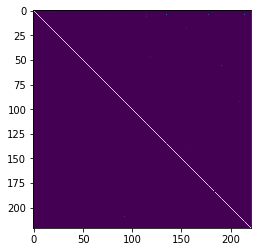

[ 1.          1.          0.95803754  0.99440371  0.99337354  0.99313502
  0.99611357  1.          0.95396857  0.99985304  0.99545966  0.99161603
  0.98664058  0.97638202  1.          0.98861278  0.98968799  0.99991059
  0.97435363  0.99003955  0.99918119  0.95018788  0.99288858  0.98007891
  0.98512029  1.          0.99870544  0.998858    1.          0.99357886
  1.          0.99967529  0.99988731  0.99708049  1.          0.99790205
  1.          1.          1.          0.98686816  0.9935805   0.9929704   1.
  1.          0.98069972  1.          0.99868229  0.98545563  0.99780624
  0.91466888  1.          0.98855398  0.99689145  0.967066    0.99105728
  1.          0.98437753  1.          0.98505526  0.99454915  0.98876028
  0.98265122  1.          0.99169295  1.          1.          1.          1.
  1.          0.99994838  0.99969264  0.9955815   0.99349327  0.99997677
  0.96009941  0.99986801  0.99716719  1.          0.97133283  1.
  0.97295009  0.91750681  0.99857148  1.          1

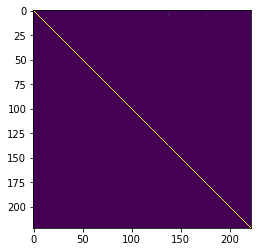

[ 1.          1.          0.95651567  0.99440371  0.99203369  0.99407756
  0.99813834  1.          0.94282047  0.99975729  0.99481326  0.98668378
  0.98206266  0.97238896  0.99880541  0.98666062  0.98684785  0.99991858
  0.97268554  0.98985023  0.99918893  0.95123829  0.99109988  0.98000107
  0.98152779  0.92522054  0.99874131  0.99882512  1.          0.99515424
  1.          0.99969229  0.99988957  0.99494963  1.          0.99801378
  1.          1.          1.          0.98857986  0.98609887  0.99342014
  0.99344992  1.          1.          0.98409448  0.98014156  1.
  0.99693048  0.99886707  0.98631847  0.99782338  0.94697001  1.
  0.96898066  0.99057103  1.          1.          0.97702919  0.99302208
  0.99570367  0.99059445  0.98210221  1.          0.99173945  1.          1.
  1.          0.98959916  1.          0.99954973  0.9997496   0.99571151
  0.99400557  0.99997677  0.96014718  0.97233692  1.          0.99723361
  1.          0.96325118  0.99832946  1.          0.97405978  0

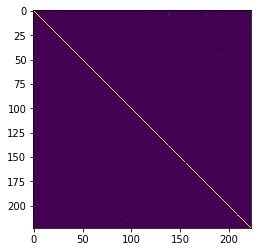

[ 1.          1.          0.96133948  0.99452308  0.99304586  0.99364933
  0.94823983  0.99815052  1.          0.99978455  0.99523447  0.99416329
  0.97846954  0.97519121  0.99397637  0.98602563  0.99944609  0.98181581
  0.97078002  0.98866566  0.9990971   0.94757219  0.96318044  0.98179427
  0.98192166  0.99096352  0.92485832  0.99659233  0.99844973  1.          0.9961856
  1.          0.99971494  0.99987228  0.99550834  0.99824026  0.99813303
  1.          1.          0.98609887  0.99279612  0.99343865  1.          1.
  1.          0.98195488  0.9764388   1.          0.99698479  0.99897521
  0.98736027  0.99786613  0.94649135  0.99762095  0.99085627  1.          1.
  1.          0.97495544  0.99256142  0.99144919  0.99138114  0.98350896
  1.          0.99171853  1.          1.          0.9743249   1.
  0.99313096  1.          0.99512792  0.99908121  0.99592149  0.98730162
  0.99997675  0.96117954  0.96527993  1.          0.9973094   1.          1.
  0.9532388   1.          0.99834222

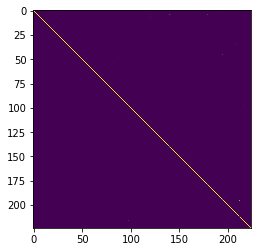

[ 1.          1.          0.95925272  0.99453951  0.99359568  0.95112984
  0.99381973  0.99515984  0.9970528   1.          0.99971629  0.96366017
  0.95617699  0.98811663  0.97558182  0.9911759   0.99993667  0.99188238
  0.96780488  0.98407231  0.98240967  0.99452502  0.97935626  0.94739085
  0.97995868  0.97896649  0.98855821  0.9247229   0.9969859   0.99773911
  1.          0.9961849   1.          0.99973254  0.9997701   0.99396402
  0.99303825  0.99818199  0.95745351  1.          0.9434845   0.98609887
  0.99121887  0.99331157  1.          1.          1.          0.97966237
  0.97463818  1.          0.996541    0.99875478  0.99785957  0.95690874
  0.99766288  0.99791141  0.98841683  1.          1.          1.
  0.97400244  0.99532719  0.9855586   0.99222794  0.99882726  0.99158149
  0.97672404  1.          0.97540784  1.          0.99317501  1.
  0.98880205  0.99899824  0.99593197  0.95343632  0.99627342  0.94448608
  0.97273128  0.99999647  0.99729639  0.96540627  1.          1.   

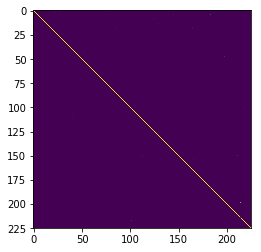

[ 0.99492902  0.99389229  0.95539587  0.99304282  0.99536203  0.99808679
  1.          0.99964369  0.96280177  0.95508276  0.98565441  0.96833079
  0.96562244  1.          0.99911581  0.95783945  0.99008595  0.9824914
  0.9820158   0.99467526  0.96813447  0.94777231  0.97716827  0.97951461
  0.98830321  0.93533612  0.99700488  0.99726446  1.          0.99665655
  0.99431085  0.99962591  0.99926391  0.9932016   0.97995986  0.99822296
  0.96602012  1.          0.94633994  0.98625555  0.9909598   0.99369334
  1.          0.99913016  1.          0.9788381   0.97010587  1.
  0.99292806  0.99880793  1.          0.99821332  0.95958584  0.99766342
  0.99822617  0.9885188   1.          1.          1.          0.97399612
  0.99413752  0.99229754  0.98174696  0.99883023  0.9999542   0.9777682   1.
  0.97659862  1.          0.9933712   1.          0.98614967  0.99863103
  0.99611855  0.9531946   0.99639249  0.97599265  0.96087274  0.99947387
  0.99144885  0.96538951  1.          1.          1.    

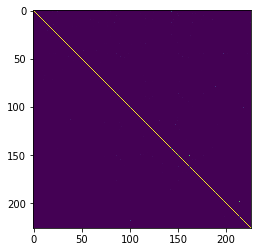

[ 0.99616673  0.93496348  1.          0.99684613  0.99464645  0.9522503
  0.99680985  1.          0.99962646  0.99969492  0.95073857  0.9485583
  0.99970919  0.95224766  0.99807538  0.98901631  0.93881001  0.96657121
  1.          0.98542924  0.96341298  0.99531739  0.98625555  0.98952465
  0.99943853  0.99256856  1.          0.99924596  1.          0.97604439
  0.97444581  1.          0.95492653  0.94710196  1.          0.9400474
  0.99008196  0.88108932  0.99884028  0.99820975  0.96404254  0.99757144
  1.          0.99823059  0.99016962  1.          1.          1.
  0.97840813  0.93493075  0.97310816  0.99371905  0.99492817  0.99273437
  0.97719827  0.99827973  0.9999519   0.99137429  0.97617505  1.
  0.97733077  1.          0.9933712   1.          0.98089291  0.96531838
  0.99869592  0.99626431  0.94455941  0.99639538  0.96899694  0.96058877
  0.97621258  0.99950679  0.97403242  1.          0.96687491  1.          1.
  0.95519755  0.9999565   0.8289443   0.99960957  0.99818344  0.86

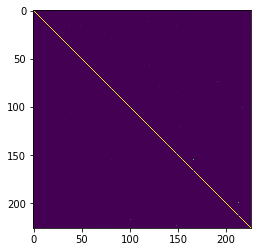

[ 0.99491988  0.99301802  0.95294638  0.98995231  0.994774    0.9971492   1.
  0.99677407  1.          0.99928412  0.96970739  0.98337676  0.96914073
  0.98641286  0.97608882  1.          0.99930476  0.96763545  0.9882261
  0.97191811  0.94838996  0.9927519   0.975548    0.95498977  0.97227757
  0.97827807  0.98269697  0.93501431  0.99624137  0.99678992  0.9995454   1.
  0.99623885  1.          0.99962324  0.99972414  0.95482607  0.92687648
  0.99978102  0.98821806  0.92520875  0.99821342  0.987664    0.9888254
  0.99310432  1.          1.          0.97202202  0.99852459  0.95540232
  0.9404247   1.          0.99888933  0.99825003  0.99758154  0.9982448
  0.88452098  0.99008067  1.          1.          0.99531338  0.93036645
  0.97175656  0.99430773  0.9457979   0.99335935  0.97417429  0.9982804
  0.99995183  0.97617505  1.          0.9806443   1.          0.99343412
  1.          0.97872674  0.99892541  0.9993448   0.92036482  0.99550292
  0.93512529  0.96416178  1.          0.9978619

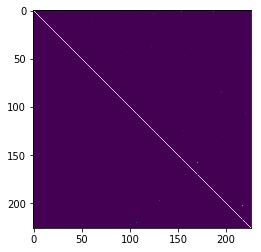

[ 0.99951705  0.99430627  0.96634472  0.96361509  0.9948954   0.98698408
  0.9947872   0.99728798  1.          0.99636153  1.          0.99893969
  0.96430643  0.98105569  0.96692523  0.98765099  0.99989215  0.99867147
  0.95759649  1.          0.9993357   0.96697321  0.98700085  0.97113107
  0.94118531  0.99243607  0.97450372  0.9444694   0.97266463  0.98074411
  0.97322312  0.93594697  0.99549276  0.99659291  0.99954402  1.
  0.99200919  1.          0.99963409  0.99972811  0.93030316  0.9997812
  0.9939818   0.98711311  0.92538948  0.99821342  0.98590358  0.98829031
  0.99195595  1.          1.          0.9696523   0.95619907  0.98282041
  0.94616479  1.          0.99834315  0.99637005  0.99830779  0.87248919
  0.9902482   1.          1.          0.99560833  0.91248589  0.97179237
  0.94963473  0.99879963  0.9729467   0.9958241   0.98675972  0.9770117   1.
  0.99247789  1.          0.99318695  1.          0.98114447  0.99889078
  0.99938004  0.92654115  0.99550292  0.98255181  0.9318

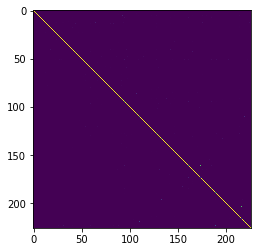

In [5]:
for y in years:
    pos = np.diagonal(data[y]['data_all'])
    print pos
    plt.imshow(data[y]['data_all'])
    plt.show()

664 226


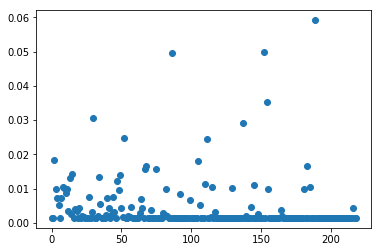

684 219


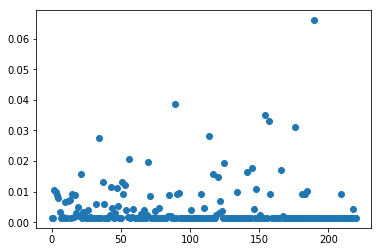

712 221


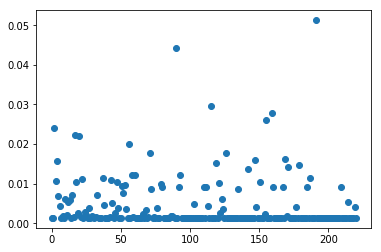

750 221


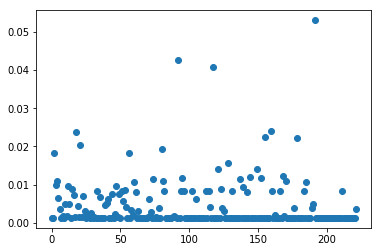

806 222


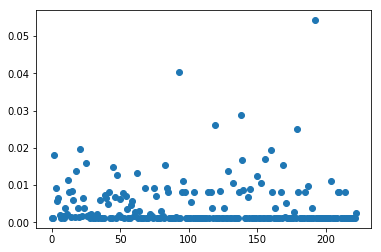

976 223


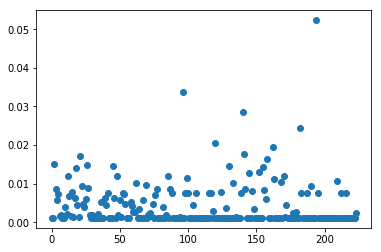

1082 224


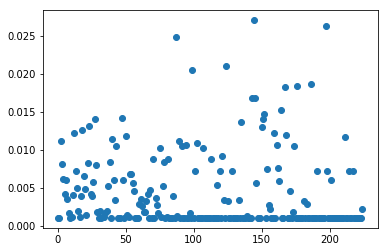

1268 225


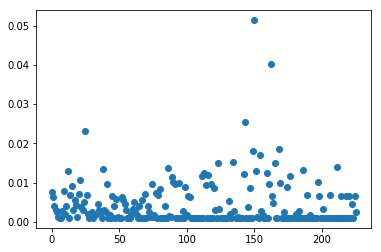

1424 226


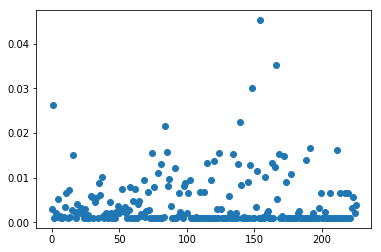

1558 226


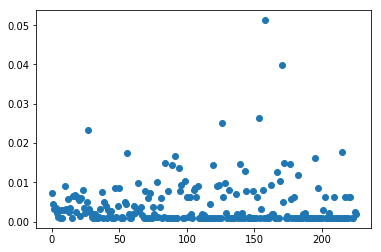

1646 226


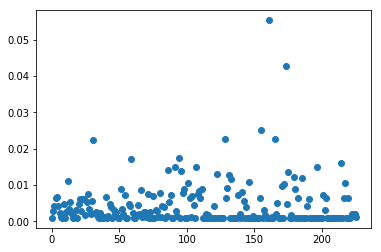

In [50]:
#PageRank centrality with igraph

for y in years:


    df_all_pairs =  [ {k:v for k,v in m.items() if v>0.0} for m in data[y]['data_all'].to_dict(orient='rows')]
    df_all_pairs = dict(zip(data[y]['data_all'].index.values,df_all_pairs))
    
    G = igraph.Graph(directed=True)
    
    countries = list(data[y]['data_all'].index)
    
    for c in countries:
        G.add_vertex(c)
    
    for k,v in df_all_pairs.items():
        #print k
        #print v
        v.pop(k,None)

        for k2,v2 in v.items():
            G.add_edge(k, k2, weight=v2)
                
    print len(G.es['weight']), len(pr_all)
    pr_all = G.personalized_pagerank(vertices=G.vs, weights=G.es["weight"], directed=True) 
    #for e in G.vs:
    #    print e
    #print pr_all
    
    #print df_all_pairs
    names = list(data[y]['data_all'])
    #names_copy = copy.copy(names)
    #inds = np.array(pr_all).argsort()[::-1][:]
    #sort_names_pr = np.array(names_copy)[inds]
    #sort_centrality_pr = np.array(pr_all)[inds]
    #sort_names_pr, sort_centrality_pr
    plt.plot(pr_all, "o")
    plt.show()

### Loading matrices and making projections

In [7]:
#Extracting bipartite adj mat
ADJ_bip_green = np.loadtxt(open(path_to_matrices + current_year + "_green_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
ADJ_bip_blue = np.loadtxt(open(path_to_matrices + current_year + "_blue_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) #getting the adjacency matrix
#Does the all category include the green and blue or is it just the dirty ones? In principle we would like to have 
#only the dirty ones, right?
ADJ_bip_all = np.loadtxt(open(path_to_matrices + current_year + "_all_MW.csv", "rb"), delimiter=",", skiprows=1, 
           usecols=range(1,n_countries+1)) 
#To get the high emission plants we use the all matrix and remove the "clean" part
ADJ_bip_dirty = ADJ_bip_all - (ADJ_bip_green + ADJ_bip_blue)


#Making the company projection
ADJ_comp_green =  (ADJ_bip_green/ADJ_bip_green.sum()).dot(ADJ_bip_green.T/(ADJ_bip_green.T.sum()))
ADJ_comp_blue =  (ADJ_bip_blue/ADJ_bip_blue.sum()).dot(ADJ_bip_blue.T/(ADJ_bip_blue.T.sum()))
ADJ_comp_all =  (ADJ_bip_all/ADJ_bip_all.sum()).dot(ADJ_bip_all.T/(ADJ_bip_all.T.sum()))
ADJ_comp_dirty =  (ADJ_bip_dirty /ADJ_bip_dirty .sum()).dot(ADJ_bip_dirty.T/(ADJ_bip_dirty .T.sum()))
#Making the country projection
ADJ_country_green =  (ADJ_bip_green.T/ADJ_bip_green.T.sum()).dot(ADJ_bip_green/(ADJ_bip_green.sum()))
ADJ_country_blue =  (ADJ_bip_blue.T/ADJ_bip_blue.T.sum()).dot(ADJ_bip_blue/(ADJ_bip_blue.sum()))
ADJ_country_all =  (ADJ_bip_all.T/ADJ_bip_all.T.sum()).dot(ADJ_bip_all/(ADJ_bip_all.sum()))
ADJ_country_dirty =  (ADJ_bip_dirty.T /ADJ_bip_dirty.T .sum()).dot(ADJ_bip_dirty/(ADJ_bip_dirty.sum()))

#Getting the percentage of emissions of each type for each country
green_part = [sum(ADJ_bip_green[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
blue_part = [sum(ADJ_bip_blue[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]
dirty_part = [sum(ADJ_bip_dirty[:, i])/sum(ADJ_bip_all[:, i]) for i in range(n_countries)]

# Multilayer analysis

In [8]:

def make_supra_adj(ADJ_list, COUP_list):
    """Function that takes list of adj matrix and coupling and generates the supra adjacency matrix of the
    multiplex network
    Args:
        ADJ_list: list of numpy 2D array's. Each of them is an adjacency matrix
        COUP_list: list of numpy 1D array's. Each of them is the vector to be used for coupling the matrices
    Return:
        Supra Adjacency matrix. Numpy 2D array.
    """
    n_layers = len(ADJ_list)
    n_nodes = ADJ_list[0].shape[0]
    
    #stacking up adjacency matrix and coupling accordingly
    sup_list = []
    for i in range(n_layers):
        row = []
        for j in range(n_layers):
            if i == j: #if in diagonal add adjacency matrix
                row.append(ADJ_list[i])
                #print(ADJ_list[i].shape)
            else: #otherwise add the coupling (diagonal since multiplex network)
                row.append(np.diag(COUP_list[i])) #if i or j here defined direction of coupling
                #print(np.diag(COUP_list[i]).shape)
        sup_list.append(row)
        
    return np.bmat(sup_list)
    
n_nodes = n_countries
n_layers = 3
#The following function is taylored for igraph centrality
def flatten_centrality(centrality_vector, n=n_nodes, l=n_layers, names=names, hubauth=False):
    '''Centrality networks in a Multiplex are commonly expressed as a vector of
    nlx1 dimension. To have a centrality for each node it is important to flatten
    the vector into nx1 dimension. Also, it is important return a list of ranked
    nodes and another of their score.
    Args
    centrality_vector(numpy array): the centrality measure for each node-layer
    n(int): number of nodes
    l(int): number of layers
    names(list of strings): name of nodes (countries)
    hubauth(boolean): indicating if the centrality is hub or authority
    Return:
    sort_names_multi(list of strings): names of countries ordered by centrality
    sort_centrality_multi(list of flots): sorted score of nodes
    '''
    multi_centrality = []
    for i in range(n):
        cent = 0
        for k in range(l):
            cent += centrality_vector[i + n*k]
        if hubauth:
            multi_centrality.append(cent[0])
        else:
            multi_centrality.append(cent)
    node_names = np.array(copy.deepcopy(names))
    inds = np.array(multi_centrality).argsort()[::-1][:]
    sort_names_multi = node_names[inds]
    sort_centrality_multi = np.array(multi_centrality)[inds]
    
    return sort_names_multi, sort_centrality_multi    


In [9]:
#Making the supra adjacency matrix
SUPADJ_country = make_supra_adj([ADJ_country_green, ADJ_country_blue, ADJ_country_dirty], [green_part, blue_part, dirty_part]) 

In [10]:
#making the graph
G_supra = igraph.Graph.Weighted_Adjacency( SUPADJ_country.tolist() ,mode="directed") 
#computing pagerank
pr_muliplex = G_supra.personalized_pagerank(weights=G_supra.es["weight"])
#sorting it appropriately
pr_multiplex_sorted = flatten_centrality(pr_muliplex)

In [11]:
pr_multiplex_sorted

(array(['US', 'ES', 'MX', 'RU', 'BR', 'IE', 'GB', 'CL', 'PL', 'PT', 'AE',
        'KR', 'AU', 'BE', 'MA', 'TR', 'MM', 'IT', 'IL', 'UY', 'FI', 'ID',
        'PH', 'GH', 'TW', 'IQ', 'IR', 'VE', 'TH', 'VN', 'DZ', 'ET', 'CZ',
        'AT', 'AR', 'NZ', 'UZ', 'CU', 'TM', 'SY', 'SK', 'TN', 'LV', 'AZ',
        'IS', 'CH', 'LB', 'MK', 'BY', 'TZ', 'LT', 'EE', 'KG', 'ZM', 'RS',
        'LK', 'KE', 'NG', 'CR', 'EG', 'MY', 'CO', 'JP', 'PK', 'GR', 'PE',
        'HR', 'JO', 'BG', 'HU', 'BD', 'CN', 'NL', 'NO', 'DE', 'ZA', 'SE',
        'UA', 'IN', 'RO', 'FR', 'CA', 'DK', 'SA', 'BT', 'OM', 'KW', 'LY',
        'RE', 'SG', 'TJ', 'QA', 'BH', 'KZ', 'CD', 'AO', 'KP', 'PA', 'ZW',
        'MZ', 'BA', 'SS', 'PG', 'SD', 'ME', 'CY', 'AL', 'GT', 'EH', 'HN',
        'GP', 'NP', 'MQ', 'LA', 'SI', 'DO', 'MD', 'KH', 'YE', 'HT'], 
       dtype='|S2'),
 array([ 0.01086749,  0.01086593,  0.01086445,  0.01086426,  0.01086424,
         0.01086387,  0.01086373,  0.01086346,  0.01086337,  0.01086332,
         0.0108633 ,  0

Comparing it with the aggregate pagerank centrality

In [12]:
G_all =  igraph.Graph.Weighted_Adjacency( ADJ_all.tolist() ,mode="directed")
pr_all = G_all.personalized_pagerank(weights=G_all.es["weight"])
names_copy = copy.copy(names)
inds = np.array(pr_all).argsort()[:]
#If small countries are first, try including the [::-1 as below]
#inds = np.array(pr_all).argsort()[::-1][:]
sort_names_pr = np.array(names_copy)[inds]
sort_centrality_pr = np.array(pr_all)[inds]

In [13]:
sort_names_pr, sort_centrality_pr

(array(['US', 'FR', 'BR', 'MX', 'IN', 'ES', 'PK', 'SA', 'VN', 'CL', 'GB',
        'EG', 'CN', 'PT', 'PL', 'DE', 'ZA', 'MM', 'PE', 'CA', 'BD', 'IT',
        'RO', 'BG', 'AE', 'RU', 'SE', 'NL', 'KZ', 'OM', 'NO', 'IL', 'ID',
        'GH', 'JP', 'CR', 'MY', 'AU', 'TR', 'DZ', 'TJ', 'ME', 'YE', 'NZ',
        'LV', 'CU', 'AO', 'CY', 'KP', 'PG', 'EE', 'SI', 'UZ', 'RS', 'LT',
        'CD', 'BH', 'IS', 'KW', 'SS', 'TZ', 'CZ', 'SD', 'AL', 'AR', 'TH',
        'SY', 'ZM', 'MK', 'CH', 'ET', 'TM', 'IR', 'MZ', 'SK', 'KG', 'MD',
        'AT', 'BY', 'NP', 'VE', 'ZW', 'LK', 'TN', 'QA', 'AZ', 'LB', 'TW',
        'GR', 'LY', 'IQ', 'PH', 'BA', 'SG', 'NG', 'KR', 'BE', 'CO', 'MA',
        'HR', 'FI', 'KE', 'UY', 'UA', 'HU', 'DK', 'GT', 'IE', 'DO', 'LA',
        'BT', 'EH', 'JO', 'HT', 'RE', 'GP', 'MQ', 'HN', 'KH', 'PA'], 
       dtype='|S2'),
 array([ 0.00208513,  0.00237654,  0.00243707,  0.00262046,  0.00292486,
         0.00314372,  0.00330031,  0.00343078,  0.00372804,  0.00380639,
         0.00410278,  0

# Inconsistency between networkx and igraph?
I tend to trust igraph more, however the discrepancy might mean that values in general are too close. Perhaps networkx power method is not converging?

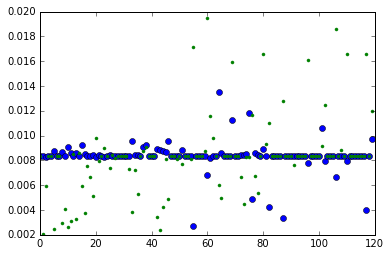

In [14]:
#PageRank centrality with igraph
G_all =  igraph.Graph.Weighted_Adjacency(ADJ_all.tolist() ,mode="directed")
pr_all = G_all.personalized_pagerank(weights=G_all.es["weight"], directed=True)
names_copy = copy.copy(names)
#inds = np.array(pr_all).argsort()[::-1][:]
inds = np.array(pr_all).argsort()[:]
sort_names_pr = np.array(names_copy)[inds]
sort_centrality_pr = np.array(pr_all)[inds]
sort_names_pr, sort_centrality_pr

#PageRank centrality with networkx
G_all_nx = nx.from_numpy_matrix(ADJ_all)
pr_all_nx = nx.pagerank(G_all_nx, weight="weight")
plt.plot(pr_all_nx.values(), "o")
plt.plot(pr_all, ".")

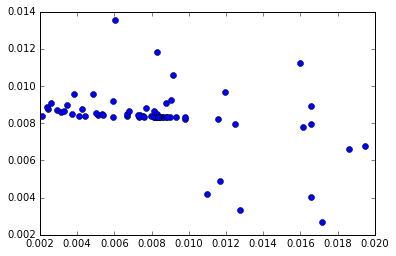

In [15]:
plt.plot(pr_all, pr_all_nx.values(), "o")

In [16]:
for i in range(n_countries):
    print i, "nx = ", names[sorted(pr_all_nx.items(), key=lambda x:x[1])[::-1][i][0]], "ig = ", sort_names_pr[i]

0 nx =  BD ig =  US
1 nx =  CR ig =  FR
2 nx =  JO ig =  BR
3 nx =  UY ig =  MX
4 nx =  LA ig =  IN
5 nx =  CL ig =  ES
6 nx =  PT ig =  PK
7 nx =  KE ig =  SA
8 nx =  PE ig =  VN
9 nx =  MX ig =  CL
10 nx =  MA ig =  GB
11 nx =  SA ig =  EG
12 nx =  RE ig =  CN
13 nx =  FR ig =  PT
14 nx =  OM ig =  PL
15 nx =  EG ig =  DE
16 nx =  BR ig =  ZA
17 nx =  IN ig =  MM
18 nx =  GH ig =  PE
19 nx =  PK ig =  CA
20 nx =  BG ig =  BD
21 nx =  ES ig =  IT
22 nx =  PL ig =  RO
23 nx =  MY ig =  BG
24 nx =  VN ig =  AE
25 nx =  ZA ig =  RU
26 nx =  RO ig =  SE
27 nx =  SE ig =  NL
28 nx =  AE ig =  KZ
29 nx =  DE ig =  OM
30 nx =  MM ig =  NO
31 nx =  NO ig =  IL
32 nx =  CN ig =  ID
33 nx =  US ig =  GH
34 nx =  GB ig =  JP
35 nx =  NL ig =  CR
36 nx =  IT ig =  MY
37 nx =  HU ig =  AU
38 nx =  IL ig =  TR
39 nx =  KZ ig =  DZ
40 nx =  RU ig =  TJ
41 nx =  CO ig =  ME
42 nx =  BA ig =  YE
43 nx =  ID ig =  NZ
44 nx =  TR ig =  LV
45 nx =  JP ig =  CU
46 nx =  GR ig =  AO
47 nx =  SG ig =  CY
48

In [66]:
#If we want to do Hubs and Auth the following code will be usefull
"""def G_list_hub(G_adj_list):
    '''
    Args(list): list of graphs adjacency matrices
    Return(list): list of adjacency matrices to be used in the block diagonal
    of the supra adjacency matrix for hub score
    '''
    G_hub = []
    for g in G_adj_list:
        new = np.dot(g, g.transpose())
        G_hub.append(new)
    return G_hub

def G_list_auth(G_adj_list):
    '''
    Args(list): list of graphs adjacency matrices
    Return(list): list of adjacency matrices to be used in the block diagonal
    of the supra adjacency matrix for auth score
    '''
    G_auth = []
    for g in G_adj_list:
        new = np.dot( g.transpose(), g)
        G_auth.append(new)
    return G_auth

def hub_auth_diag(Coup_list):
    coup = []
    for c in Coup_list:
        coup.append(c*c)
    return coup"""


"def G_list_hub(G_adj_list):\n    '''\n    Args(list): list of graphs adjacency matrices\n    Return(list): list of adjacency matrices to be used in the block diagonal\n    of the supra adjacency matrix for hub score\n    '''\n    G_hub = []\n    for g in G_adj_list:\n        new = np.dot(g, g.transpose())\n        G_hub.append(new)\n    return G_hub\n\ndef G_list_auth(G_adj_list):\n    '''\n    Args(list): list of graphs adjacency matrices\n    Return(list): list of adjacency matrices to be used in the block diagonal\n    of the supra adjacency matrix for auth score\n    '''\n    G_auth = []\n    for g in G_adj_list:\n        new = np.dot( g.transpose(), g)\n        G_auth.append(new)\n    return G_auth\n\ndef hub_auth_diag(Coup_list):\n    coup = []\n    for c in Coup_list:\n        coup.append(c*c)\n    return coup"

In [67]:
pd.__version__


u'0.18.1'